In [4]:
from data_process.DatasetHelper import ImageDataset
from data_process.DatasetHelper import label_map

# unzip the augmented dataset and load it
training_data = ImageDataset('./data/aug_0')
print()
testing_data = ImageDataset('./data/aug_0', train=False)

batch_size = 40

train_loader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size, shuffle=True, num_workers=1)

label: 0 with 800 images, named as "cloth_mask"
label: 1 with 800 images, named as "no_face_mask"
label: 2 with 800 images, named as "surgical_mask"
label: 3 with 800 images, named as "n95_mask"
label: 4 with 800 images, named as "mask_worn_incorrectly"

label: 0 with 200 images, named as "cloth_mask"
label: 1 with 200 images, named as "no_face_mask"
label: 2 with 200 images, named as "surgical_mask"
label: 3 with 200 images, named as "n95_mask"
label: 4 with 200 images, named as "mask_worn_incorrectly"


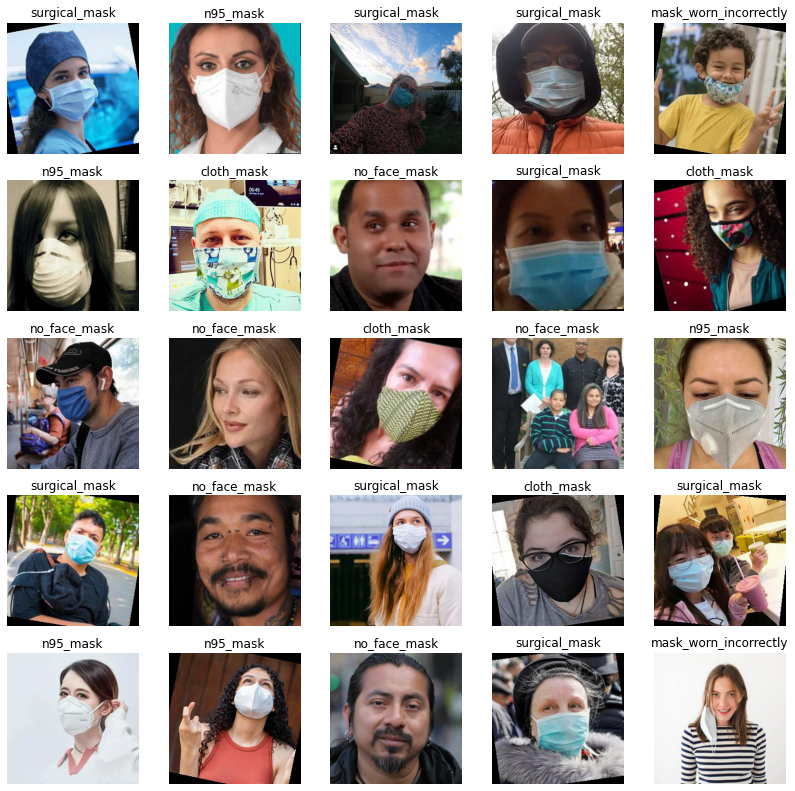

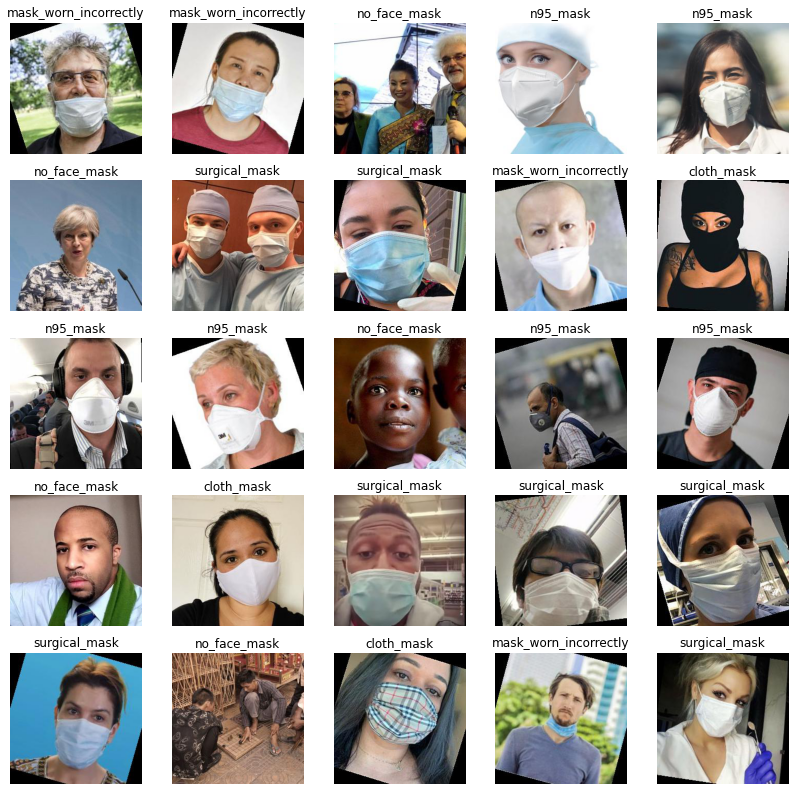

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

def show_image_rand(img_data):
    figure = plt.figure(figsize=(14, 14))
    cols, rows = 5, 5
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(img_data), size=(1,)).item()
        img, label = img_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label_map[label])
        plt.axis("off")
        plt.imshow(img.permute(1, 2, 0))
    plt.show()
    
show_image_rand(training_data)
show_image_rand(testing_data)

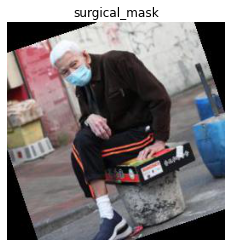

In [82]:
from torch.autograd import Variable

for i, (items, classes) in enumerate(train_loader):
    items = Variable(items)
    classes = Variable(classes)
    
    plt.imshow(items[0].permute(1, 2, 0))
    plt.axis('off')
    plt.title(label_map[int(classes[0])])
    
    break